In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [123]:
salesBlackFriday = pd.read_excel('/home/jose/Downloads/black_friday_app/datasets/TRM_Historico.xls')

In [124]:
salesBlackFriday.head()

,Fecha,TRM
0,1991-11-27,693.32
1,1991-11-28,693.99
2,1991-11-29,694.70
3,1991-11-30,694.70
4,1991-12-01,643.42


In [125]:
#tipos de datos de los campos
salesBlackFriday.dtypes

Fecha    datetime64[ns]
TRM             float64
dtype: object

In [126]:
#información de la base de datos
salesBlackFriday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9821 entries, 0 to 9820
Data columns (total 2 columns):
Fecha    9821 non-null datetime64[ns]
TRM      9821 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 153.5 KB


In [127]:
salesBlackFriday.describe()

,TRM
count,9821.000000
mean,1947.144108
std,705.396325
min,620.620000
25%,1397.120000
50%,1965.830000
75%,2389.750000
max,3434.890000


In [128]:
#se modifica el índice y se nombra con index
salesBlackFriday.index = salesBlackFriday.Fecha
salesBlackFriday.index.names = ['index']

In [129]:
salesBlackFriday.head()

,Fecha,TRM
index,,
1991-11-27,1991-11-27,693.32
1991-11-28,1991-11-28,693.99
1991-11-29,1991-11-29,694.70
1991-11-30,1991-11-30,694.70
1991-12-01,1991-12-01,643.42


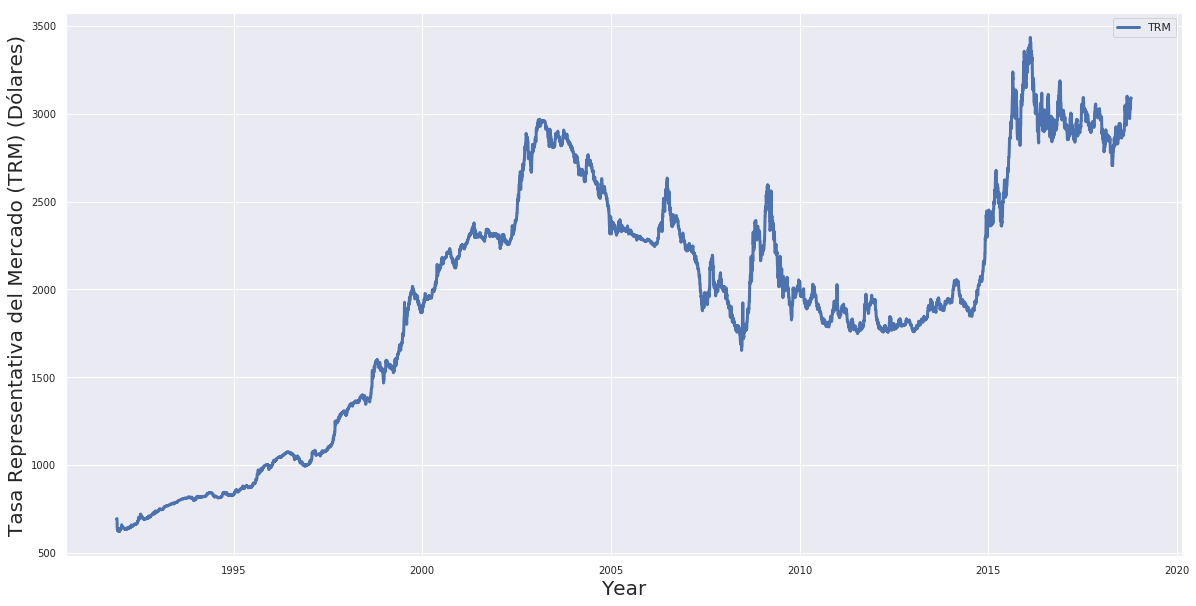

In [130]:
salesBlackFriday.plot(x='Fecha', y='TRM', figsize=(20,10), linewidth=3, fontsize=10)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Tasa Representativa del Mercado (TRM) (Dólares)', fontsize=20)
plt.show()

# El modelo de regresión lineal solo acepta números, por ende, cambiamos el tipo de dato fecha a number

In [131]:
salesBlackFriday['Fecha'].dtype

dtype('<M8[ns]')

In [132]:
import datetime as dt

salesBlackFriday['Fecha'] = pd.to_datetime(salesBlackFriday['Fecha'])
salesBlackFriday['Fecha'] = salesBlackFriday['Fecha'].map(dt.datetime.toordinal)

In [133]:
salesBlackFriday['Fecha']
salesBlackFriday['Fecha'].dtype

dtype('int64')

In [134]:
dataDate = salesBlackFriday[['Fecha']]

# se genera el array 2D con el índice y fecha

dates = np.array(dataDate)

# se genera el array 1D con el TRM

prices = np.array(salesBlackFriday['TRM'])
prices

array([ 693.32,  693.99,  694.7 , ..., 3088.78, 3088.78, 3088.78])

In [135]:
salesBlackFriday.tail()

,Fecha,TRM
index,,
2018-10-12,736979,3087.34
2018-10-13,736980,3088.78
2018-10-14,736981,3088.78
2018-10-15,736982,3088.78
2018-10-16,736983,3088.78


In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#separar los datos del dataset de entrenamiento

X_train, X_test, y_train, y_test = train_test_split(dates, prices)
y_test

array([3294.02, 1759.41, 2934.03, ..., 1918.62, 1866.2 , 1998.95])

In [137]:
#Creamos el objeto de LinearRegression que va a ser nuestor modelo a usar

regr = LinearRegression()

#Ajustamos el modelo con nuestros datos

regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [138]:
print('Pendiente: ', regr.coef_, ' - Inercepto con el eje y: ', regr.intercept_)

Pendiente:  [0.18594729]  - Inercepto con el eje y:  -134178.32762218357


In [145]:
y_predic = regr.predict(X_test)
y_predic

array([2668.09259418, 2367.97366873, 2726.85193769, ..., 2581.25520992,
       2345.65999398, 1607.2633069 ])

# Ahora, se probará con el gradiente del descenso para hallar el valor del intercepto con el eje y y la pendiente de la ecuación de la regresión lineal

In [221]:
# Pendiente:  [0.18594729]  - Inercepto con el eje y:  -134178.32762218357

#Definimos alpha
alpha = 0.0000000000000009

#inicializamos theta_0 y theta_1
theta_zero = 0
theta_one = 0

for i in range(1, 20):
    
    temp_theta_zero = theta_zero - alpha * (1/len(X_train)) * np.sum((theta_zero + theta_one * X_train) - y_train)
    temp_theta_one = theta_one - alpha * (1/len(X_train)) * np.sum(((theta_zero + theta_one * X_train) - y_train)*X_train)
    
    theta_zero = temp_theta_zero 
    theta_one = temp_theta_one 
    
print('Intercepto con el eje y = ', theta_zero, 'Pendiente de la ecuación = ', theta_one)

Intercepto con el eje y =  0.19628483074540315 Pendiente de la ecuación =  143697.0338077203


In [195]:
# y = 2x + 1
array_x = np.array([1, 2, 3, 4, 5])
array_y = np.array([3, 5, 7, 9, 11])
np.sum((2 * array_x + 1 - array_y)**2)

0

In [220]:
theta_zero = 0.18594729
theta_one = -134178.32762218357
J = 1/(2*len(X_train)) * np.sum(((theta_zero + theta_one * X_train) - y_train)**2)
J

3.5532282221619217e+25

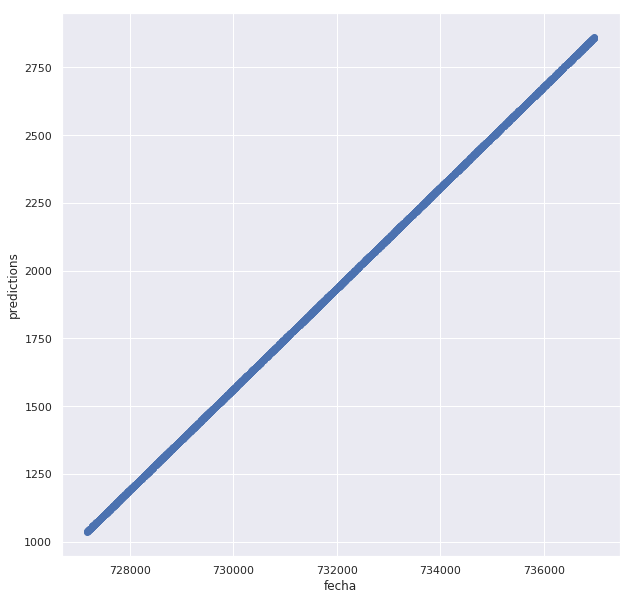

In [203]:
# Visualize the inputs and predicted values

plt.figure(figsize=(10,10))
plt.scatter(X_test, y_predic)
plt.xlabel('fecha')
plt.ylabel('predictions')
plt.show()

In [223]:
print('Fecha: ',X_test[0], 'TRM', y_test[0])
print(salesBlackFriday.iloc[2457, :])
print(regr.predict([[729620]]))

Fecha:  [735942] TRM 3294.02
Fecha    729620.00
TRM        1385.77
Name: 1998-08-19 00:00:00, dtype: float64
[1492.53382921]


In [237]:
%matplotlib inline

In [252]:
# coeficiente de determinación
# mejor puntuación posible 1

from sklearn.metrics import r2_score, mean_squared_error

print('Mean Squared Error: %.2f' % mean_squared_error(y_test, y_predic))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_predic))

Mean Squared Error: 223277.21
Variance score: 0.54


In [253]:
# calcular la prediccion del dolar para la fecha deseada 23-nov-2018

from datetime import datetime as dt
d = dt.strptime('2018-11-23', '%Y-%m-%d').date()
print(d)

print(d.toordinal())

2018-11-23
737021


In [255]:
trm_bf_2018 = regr.predict([[737021]])
print('El valor de la TRM esperado para el Black Friday es: ${} pesos'.format(round(trm_bf_2018[0])))

El valor de la TRM esperado para el Black Friday es: $2869.0 pesos
